## Importar librerias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
import seaborn as sns
global df_ventas, df_ventas_limpio

In [2]:
def obtencion_datos():
    import pandas as pd 
    import matplotlib.pyplot as plt  
    import matplotlib.dates as mdates
    global df_ventas, df_ventas_limpio
    
    df_ventas = pd.read_csv("reporte_ventas.csv", sep=",")
    print('Informacion:')
    print(df_ventas.info())
    print('------------')
    print('Duplicados:')
    print(df_ventas.duplicated().sum())
    print('------------')
    print('Registros de pruebas:')
    print((df_ventas['nombre_cliente'] == 'prueba').sum())
    print('------------')
    print('Registros con ganancias <=0')
    print((df_ventas['total_ganancia'] <=0).sum())
    
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')
    
    print(f'Tamaño del set antes de eliminar las filas repetidas: {df_ventas.shape}')
    df_ventas_limpio = df_ventas.drop_duplicates(inplace=False)  # inplace=False para que devuelva un nuevo DataFrame
    print(f'Tamaño del set después de eliminar las filas repetidas: {df_ventas_limpio.shape}')
    
    # Eliminamos de la columna nombre_cliente las filas cuyo valor sea prueba
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']
    
    # Eliminamos los dos datos nulos en la columna nombre_cliente
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])
    
    # filtramos las filas donde el valor en la columna total_ganancia es mayor que cero
    # reset_index para actualizar el índice del DataFrame. 
    # ll parámetro drop=True se utiliza para descartar el índice anterior
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
    
    # Df limpio
    print('Informacion:')
    print(df_ventas_limpio.info())
    print('------------')
    print('Duplicados:')
    print(df_ventas_limpio.duplicated().sum())
    print('------------')
    print('Registros de pruebas:')
    print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
    print('------------')
    print('Registros con ganancias <=0')
    print((df_ventas_limpio['total_ganancia'] <=0).sum())
    
obtencion_datos()   

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int6

## Cuáles son las ventas totales por año Y qué año tuvo mejor desempeño

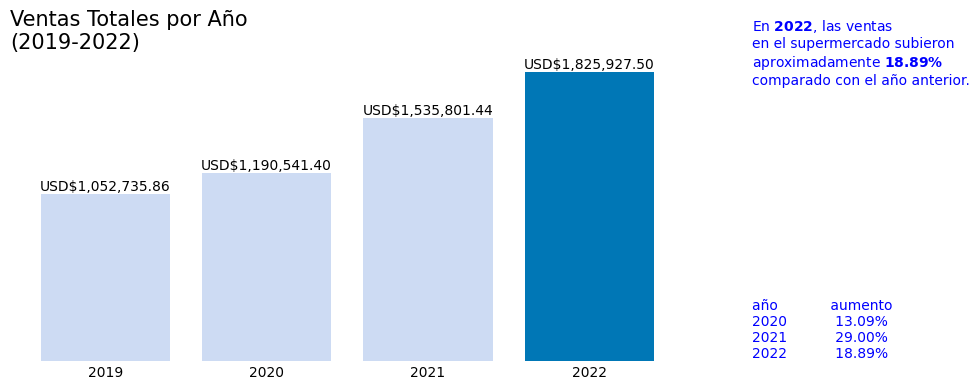

In [31]:
def  pregunta_1():
    global df_ventas, df_ventas_limpio
    
    # Creamos un nuevo df con las columnas de fecha
    df_ventas_año = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
    # Creamos una nueva columna año
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year
    # Eliminamos la columna fecha_pedido
    df_ventas_año.drop(['fecha_pedido'], axis=1, inplace=True)
    # agrupamos por la columna año y sumamos los valores
    df_ventas_año = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()
    # graficamos
    # Creamos una lista de colores
    colores = ['#CDDBF3', '#CDDBF3', '#CDDBF3', '#0077b6']

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Crear el gráfico de barras verticales
    ax.bar(df_ventas_año['año'], df_ventas_año['total_venta'], color=colores, width=0.8)

    # Colocar los valores sobre cada barra
    for bar in ax.patches:
        valor = bar.get_height()
        qtd = f"USD${valor:,.2f}"  # Formatear el valor como texto con símbolo de dólar
        ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom',fontsize=10,  color='black')

    # Configuramos el titulo
    ax.set_title('Ventas Totales por Año\n(2019-2022)',loc='left', fontsize=15,  color='black')

    # Controlar el formato de las etiquetas del eje X
    ax.set_xticks(df_ventas_año['año'])
    ax.set_xticklabels(df_ventas_año['año'].astype(int))

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar los ticks del eje X y Y
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_yticks([])  # Ocultar los ticks del eje Y

    # Texto 
    texto = ("En $\\mathbf{2022}$, las ventas\n"
             "en el supermercado subieron\n"
             "aproximadamente $\\mathbf{18.89\\%}$\n"
             "comparado con el año anterior.")

    # egundo texto
    texto2 = ("año            aumento\n"
              "2020           13.09%\n"
              "2021           29.00%\n"
              "2022           18.89%")

    # Añadir texto y alinear 
    ax.text(1.10, 0.90, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=10, color='blue')
    ax.text(1.10, 0.0, texto2, transform=ax.transAxes, ha='left', va='bottom', fontsize=10, color='blue')

    plt.tight_layout()
    plt.savefig('img/ventas-totales-año.png')
    #plt.savefig('img/ventas-totales-año.pdf')

    plt.show()
    

pregunta_1()    
    

## ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

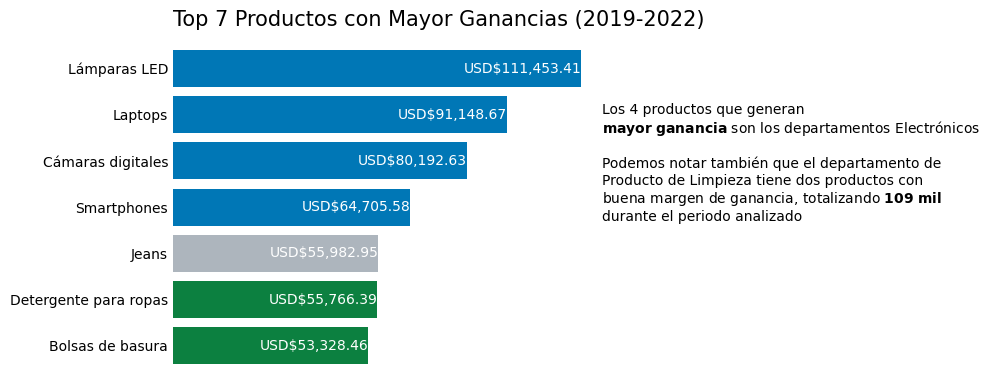

In [27]:
def pregunta_2():
    global df_ventas, df_ventas_limpio
    
    # Crea una copia del DataFrame df_ventas_limpio
    df_top_ganancias = df_ventas_limpio.copy()

    # Crear un DataFrame nuevo con los datos de las columnas tipo_producto y total_ganancia
    df_top_ganancias = df_top_ganancias[['tipo_producto', 'total_ganancia']]
    
    # agrupamos por tipo_producto y departamento_producto luego sumamos los valores de la columna total_ganancia
    df_top_ganancias = df_top_ganancias.groupby('tipo_producto')['total_ganancia'].agg('sum')

    # ordenamos  la columna total_ganancia en orden descendente 
    df_top_ganancias = df_top_ganancias.sort_values(ascending=False)

    # recetear el index
    df_top_ganancias = df_top_ganancias.reset_index(name='total_ganancia')
    
    
    # ordenamos el DataFrame por total_ganancia en orden descendente
    df_top_ganancias = df_top_ganancias.sort_values(by='total_ganancia', ascending=False)

    # Resetear los indices para mantener el orden original
    df_top_ganancias = df_top_ganancias.reset_index(drop=True)

    # Seleccionar los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7)

    

    # Creamos una lista de colores
    colores = ['#0077b6', '#0077b6', '#0077b6', '#0077b6', '#adb5bd', '#0C8040', '#0C8040']

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Crear el gráfico de barras horizontales
    bars = ax.barh(df_top_ganancias['tipo_producto'], df_top_ganancias['total_ganancia'], color=colores, align='center')

    # Colocar los valores dentro de las barras con color blanco
    for bar in bars:
        valor = bar.get_width()
        qtd = f"USD${valor:,.2f}"  # Formatear el valor como texto con símbolo de dólar
        ax.text(valor, bar.get_y() + bar.get_height()/2, qtd, ha='right', va='center', color='white')

    # Configuración del titulo
    ax.set_title('Top 7 Productos con Mayor Ganancias (2019-2022)', loc='left', fontsize=15,  color='black')
    
    # Invertir el orden de las barras
    ax.invert_yaxis()

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar los ticks del eje X y Y
    ax.tick_params(axis='both', which='both', length=0)

    # Ocultar los ticks del eje Y
    ax.tick_params(axis='y', which='both', left=False)

    # Quitar los valores del eje X
    ax.set_xticks([])
    
    # Texto $\\mathbf{2022}$
    texto = ("Los 4 productos que generan\n"
         "$\\mathbf{mayor}$ $\\mathbf{ganancia}$ son los departamentos "
         "Electrónicos\n"  
         "\n"
         "Podemos notar también que el departamento de\n"
         "Producto de Limpieza tiene dos productos con\n" 
         "buena margen de ganancia, totalizando $\\mathbf{109\\ mil}$\n"  
         "durante el periodo analizado"
            )


    # Añadir texto y alinear 
    ax.text(1.0, 0.45, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.savefig('img/top7-productos.png')

    # Mostrar el gráfico
    plt.show()

 
pregunta_2()

## Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

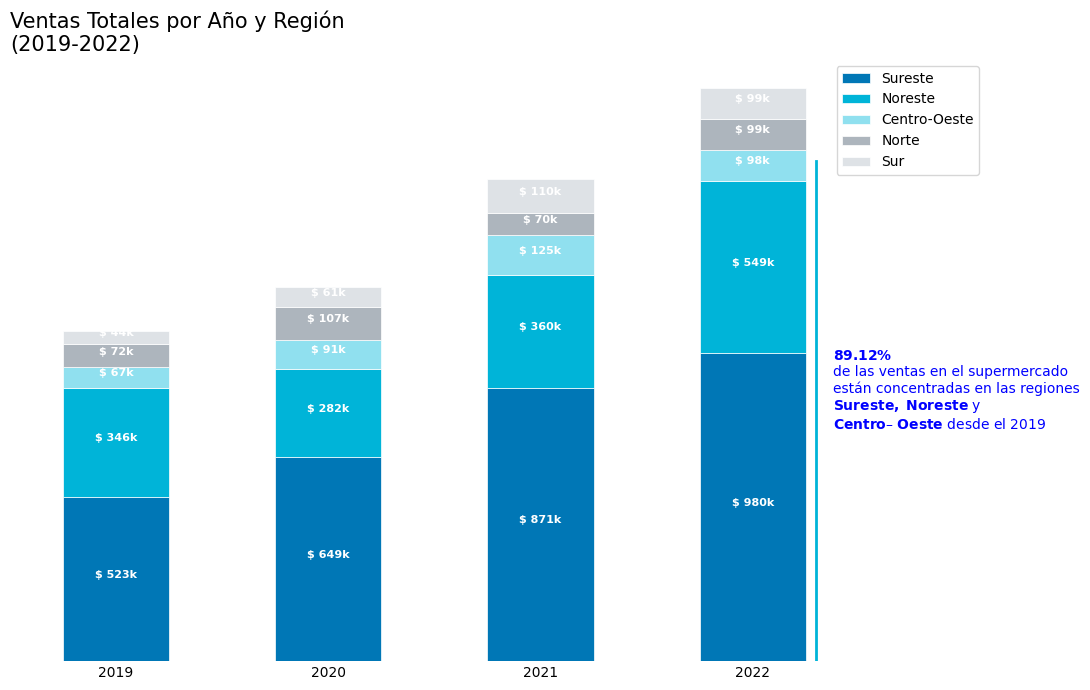

In [44]:
def pregunta_3():
    global df_ventas, df_ventas_limpio
    # Creamos un df a partir de df_ventas_limpio con la informacion de las columnas fecha_pedido, region, total_venta 
    df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
    # Creamos la columna año
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
    # Eliminamos la columna fecha_pedido
    df_ventas_año_region.drop(columns=['fecha_pedido'], inplace=True)
    # Generamos la tabla cruzada
    df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values=df_ventas_año_region['total_venta'], aggfunc='sum')

    # Reordenamos las columnas
    column_order = ['Sureste', 'Noreste', 'Centro-Oeste', 'Norte', 'Sur']
    df_ventas_año_region = df_ventas_año_region[column_order]
    # visuañizacion
    # Configuración de colores
    colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

    # Crear el gráfico de columnas apiladas con bordes más visibles
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(11, 7), color=colores, edgecolor='white', linewidth=0.5)

    # Quitar la palabra "Año" en el eje x
    ax.set_xlabel("")

    # Quitar los ticks y etiquetas del eje y
    ax.get_yaxis().set_visible(False)

    # Añadir etiquetas a las barras
    for container in ax.containers:
        for i, bar in enumerate(container.patches):
            height = bar.get_height()
            if height > 0:  # Asegurarse de que hay un valor para mostrar
                label = f"$ {height / 1000:.0f}k"  # Formatear el valor en formato de miles
                x_position = bar.get_x() + bar.get_width() / 2
                y_position = bar.get_y() + height / 2
                ax.annotate(label,
                            xy=(x_position, y_position),
                            xytext=(0, 3),  # Distancia vertical desde el punto
                            textcoords="offset points",
                            ha='center', va='center',  # Colocar el texto en el centro
                            fontsize=8, fontweight='bold', color='white')  # Añadir negrita al texto

    # Configuracion del titulo
    ax.set_title('Ventas Totales por Año y Región\n(2019-2022)', loc='left', fontsize=15,  color='black')  # Mover el título a la izquierda

    # Rotar los años horizontalmente
    plt.xticks(rotation=0)

    # Mover la etiqueta de la región a la izquierda y ajustar la posición
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

    # Texto debajo del gráfico
    texto = ("$\\mathbf{89.12\\%}$ \nde las ventas en el supermercado\n"
         "están concentradas en las regiones\n"
         "$\\mathbf{Sureste,}$ $\\mathbf{ Noreste}$ y\n"
         "$\\mathbf{Centro – }$ $\\mathbf{Oeste}$ desde el 2019")

    # Añadir texto y alinear a la izquierda
    ax.text(0.97, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=10, color='blue')

    # Línea vertical de color azul
    ax.axvline(x=3.3, ymin=0.0, ymax=0.83, color='#00b4d8', linestyle='-', linewidth=2)

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar los ticks del eje X y Y
    ax.tick_params(axis='both', which='both', length=0)

    plt.tight_layout()
    plt.savefig('img/ventas-año-region.png')
    
    # Mostrar el gráfico
    plt.show()
pregunta_3()

## Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

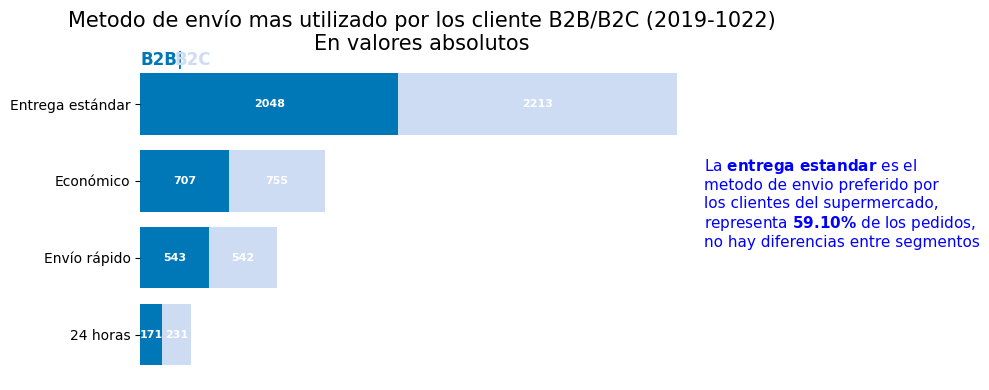

In [47]:
def pregunta_4():
    global df_ventas, df_ventas_limpio
        # Creamos una copia de df_ventas_limpio
    df_modo_envio = df_ventas_limpio.copy()
    # Guardamos solo las columnas modo_envio y segmento_cliente
    df_modo_envio = df_modo_envio[['modo_envio', 'segmento_cliente']]
    # Generamos una tabla cruzada
    df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")
    
    # Visualizacion
    # Creamos una lista de colores
    colores = ['#0077b6', '#CDDBF3']

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Crear el gráfico de barras horizontales
    bars_b2b = ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[0])
    bars_b2c = ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[1])

    # Añadir etiquetas dentro de cada barra
    for bar in bars_b2b:
        label_x_position = bar.get_x() + bar.get_width() / 2
        label_y_position = bar.get_y() + bar.get_height() / 2
        label_value = f"{bar.get_width():.0f}"
        ax.text(label_x_position, label_y_position, label_value, 
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')

    for bar in bars_b2c:
        label_x_position = bar.get_x() + bar.get_width() / 2
        label_y_position = bar.get_y() + bar.get_height() / 2
        label_value = f"{bar.get_width():.0f}"
        ax.text(label_x_position, label_y_position, label_value, 
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')

    # Configuracion del titulo
    ax.set_title('Metodo de envío mas utilizado por los cliente B2B/B2C (2019-1022)\nEn valores absolutos', loc='center', fontsize=15, color='black')


    #leyenda con el valor de segmentos de clientes
    ax.text(0, 3.5, 'B2B|', fontsize=12, fontweight='bold', color=colores[0])
    ax.text(270, 3.5, 'B2C', fontsize=12, fontweight='bold', color=colores[1])



    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar etiquetas del eje x
    ax.set_xticks([])
    
    # Texto $\\mathbf{2022}$
    texto = ("La $\\mathbf{entrega \\ estandar}$ es el\n"
             "metodo de envio preferido por\n"
            "los clientes del supermercado,\n"
            "representa $\\mathbf{59.10\\%}$ de los pedidos,\n"
            "no hay diferencias entre segmentos\n"

                )


    # Añadir texto y alinear 
    ax.text(1.0, 0.35, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=11, color='blue')
 
    plt.tight_layout()
    plt.savefig('img/envio-mas-utilizado.png')
    
    # Mostrar el gráfico
    plt.show()
    
pregunta_4()    


## Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

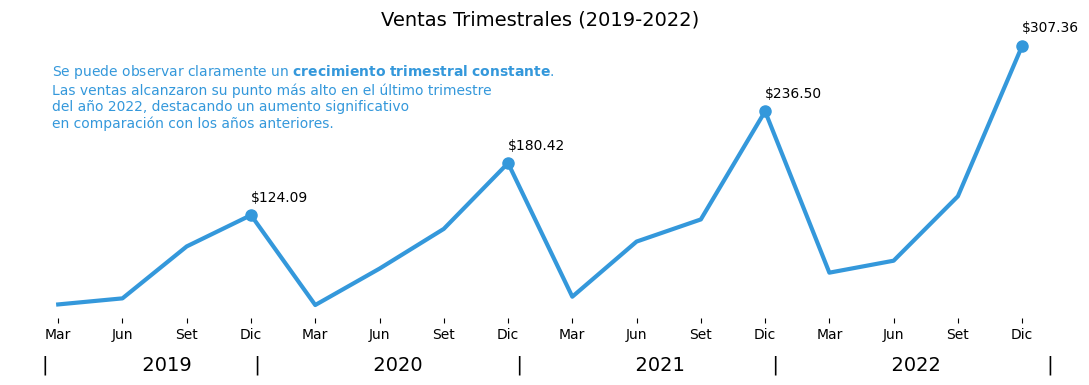

In [142]:
def pregunta5(): 
    
    global df_ventas, df_ventas_limpio
    
    # Creamos una copia y filtramos los registros
    df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()
    
    # Seleccionamos las columnas fecha_pedido y total_venta
    df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]
    
    # Establecemos la columna fecha_pedido como índice
    df_ventas_sp.set_index('fecha_pedido', inplace=True)
    
    # agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral
    df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')
    
    # Agrupa las ventas por trimestre y suma los valores
    df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
    
    # Redondear la columna total_venta a la escala de miles
    df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].round()
    
    # Formatear la columna total_venta para mostrarla en miles con dos decimales
    df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: f'{x/1000:.2f}')

    # Convertir la columna total_venta a tipo numérico
    df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'])
    # Restablecer el índice y mantener la columna 'fecha_pedido'
    df_ventas_sp = df_ventas_sp.reset_index()

    
    # Configuración de la figura y el eje
    fig, ax = plt.subplots(figsize=(12, 4))
        
    # Crear el gráfico de líneas
    puntos_a_marcar = [False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True]
    ax.plot(df_ventas_sp.index, df_ventas_sp['total_venta'], marker="o", markersize=8,  markevery=puntos_a_marcar,color='#3498db', linewidth=3)
        
    # Reemplazar las fechas en el eje X por el nombre del mes
    x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
    ax.set_xticks(df_ventas_sp.index)
    ax.set_xticklabels(x_labels, ha="center")
        
    # Colocar valores solo en el 4to Trimestre
    for i in range(3, len(df_ventas_sp), 4):
        max_value = df_ventas_sp['total_venta'][i:i+4].max()
        max_index = df_ventas_sp['total_venta'][i:i+4].idxmax()
        ax.text(max_index, max_value + 15, f"${max_value:,.2f}", ha='left')
        
    # Configuramos el titulo
    ax.set_title('Ventas Trimestrales (2019-2022)',fontsize=14, color='black')
    #ax.set_xlabel('Trimestre')
    #ax.set_ylabel('Total de Ventas ($)')
        
    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
        
        
    # Ocultar etiquetas del eje y
    ax.set_yticks([])
        
    # Texto 
    texto = ("|               2019          |                  2020               |                  2021              |                  2022                 |")
        
    # Añadir texto y alinear 
    ax.text(0.03, -0.2, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='black')
   
    # segundo texto
     
    texto2 = ("Se puede observar claramente un $\\mathbf{ crecimiento \\ trimestral \\ constante}$.\n" 
             "Las ventas alcanzaron su punto más alto en el último trimestre \n"
              "del año 2022, destacando un aumento significativo\n"
              "en comparación con los años anteriores.\n" )
        
    # Añadir texto y alinear 
    ax.text(0.04, 0.6, texto2, transform=ax.transAxes, ha='left', va='bottom', fontsize=10, color='#3498db')


    plt.tight_layout()
    plt.savefig('img/ventas-trimestre-SãoPaulo.png')
    
    # Mostrar el gráfico
    plt.show()

    

# Llamar a la función
pregunta5()


**Se puede obserbar claramente un crecimiento trimestral constante. 
Las ventas alcanzaron su punto más alto en el último trimestre del año 2022, destacando un aumento significativo en comparación con los años anteriores.**

##  ¿Que cliente gasto mas?

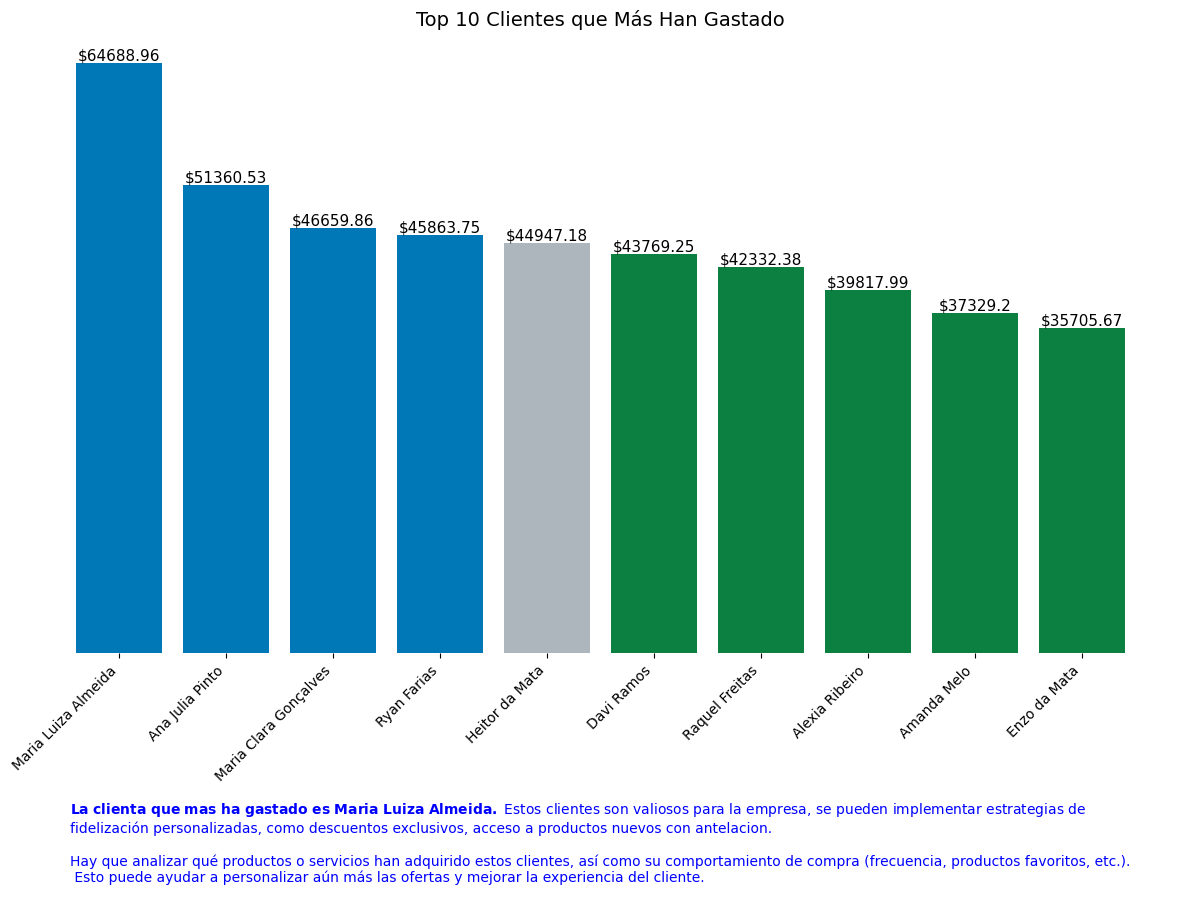

In [175]:
def pregunta6():
    global df_ventas, df_ventas_limpio
    # Agrupamos por el nombre del cliente y sumamos el valor de la venta
    compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

    # Ordenamos en orden descendente 
    compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

    # Seleccionamos los 10 primeros clientes
    top_10_clientes = compras_por_cliente.head(10)

    # Creamos una lista de colores
    colores = ['#0077b6', '#0077b6', '#0077b6', '#0077b6', '#adb5bd', '#0C8040', '#0C8040', '#0C8040', '#0C8040', '#0C8040']

    # Graficamos
    fig, ax = plt.subplots(figsize=(12, 10))
    bars = ax.bar(top_10_clientes['nombre_cliente'], top_10_clientes['total_venta'], color=colores)

    # Agregamos los valores en las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"${round(yval, 2)}", ha='center',fontsize=11, va='bottom')

    #plt.xlabel('Clientes')
    #plt.ylabel('Total de Ventas')
    plt.title('Top 10 Clientes que Más Han Gastado', fontsize=14, color='black')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Ocultar etiquetas del eje y
    ax.set_yticks([])

    #texto    
    texto = ("$\\mathbf{ La \\ clienta \\ que \\ mas \\ ha \\ gastado \\ es \\ Maria \\ Luiza \\ Almeida.}$ Estos clientes son valiosos para la empresa, se pueden implementar estrategias de\n"
             "fidelización personalizadas, como descuentos exclusivos, acceso a productos nuevos con antelacion.\n"

             "\nHay que analizar qué productos o servicios han adquirido estos clientes, así como su comportamiento de compra (frecuencia, productos favoritos, etc.).\n"
             " Esto puede ayudar a personalizar aún más las ofertas y mejorar la experiencia del cliente.\n")
        
    # Añadir texto y alinear 
    ax.text(0.04, -0.4, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=10, color='blue')


    plt.tight_layout()
    plt.savefig('img/top10-clientes.png')
    

    plt.show()
pregunta6()

**La clienta** que mas ha gastado es **Maria Luiza Almeida**. Estos clientes son valiosos para la empresa, se pueden implementar estrategias de fidelización personalizadas, como descuentos exclusivos, acceso a productos nuevos con antelacion.

Hay que analizar qué productos o servicios han adquirido estos clientes, así como su comportamiento de compra (frecuencia, productos favoritos, etc.). Esto puede ayudar a personalizar aún más las ofertas y mejorar la experiencia del cliente.


## Top 10 clientes que menos han gastado

In [15]:
# agrupamos por el nombre del cliente y sumamos el valor de la venta
compras_por_cliente_menos = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

# ordenamos en orden descendente 
compras_por_cliente_menos = compras_por_cliente_menos.sort_values(by='total_venta',  ascending=True)

compras_por_cliente_menos

,nombre_cliente,total_venta
481,Luiz Otávio Viana,18.03
297,Henrique Caldeira,22.84
46,Ana Júlia Moura,33.40
497,Marcelo Ramos,47.73
1,Agatha Carvalho,49.72
...,...,...
291,Heitor da Mata,44947.18
683,Ryan Farias,45863.75
515,Maria Clara Gonçalves,46659.86
42,Ana Julia Pinto,51360.53


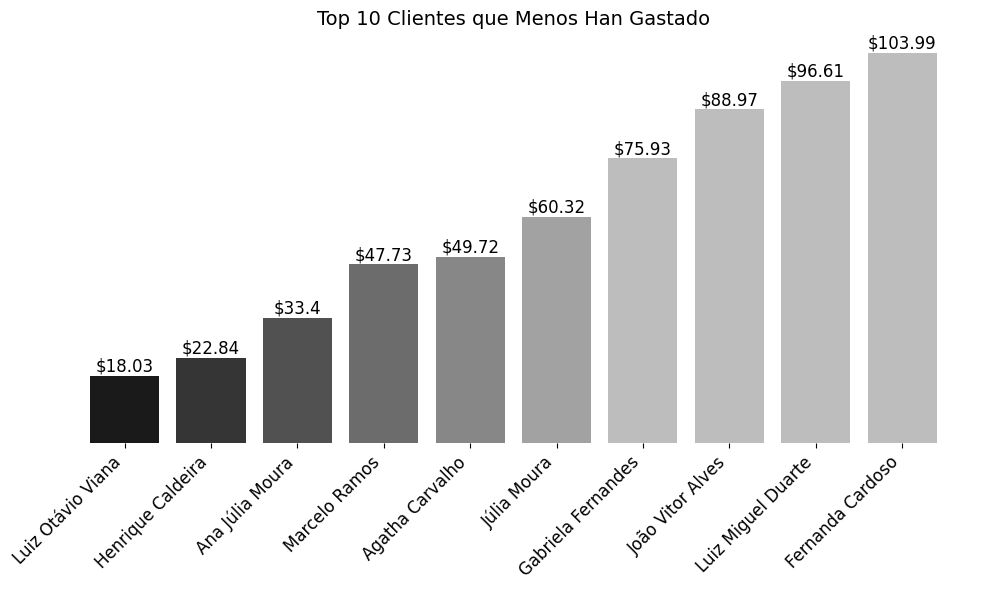

In [198]:
def pregunta6_menos_gastaron():
    global df_ventas, df_ventas_limpio
    
    # Agrupamos por el nombre del cliente y sumamos el valor de la venta
    compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

    # Ordenamos en orden ascendente para obtener los que menos gastaron
    compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=True)

    # Seleccionamos los 10 primeros clientes (los que menos gastaron)
    bottom_10_clientes = compras_por_cliente.head(10)

    # Creamos una lista de colores 
    #colores = ['#adb5bd'] * 10  # usamos un solo color 
    colores = ['#1A1A1A', '#353535', '#515151', '#6C6C6C', '#878787', '#A2A2A2', '#BDBDBD', '#BDBDBD', '#BDBDBD', '#BDBDBD']
    # Graficamos
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(bottom_10_clientes['nombre_cliente'], bottom_10_clientes['total_venta'], color=colores)

    # Agregamos los valores en las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"${round(yval, 2)}", ha='center', fontsize=12, va='bottom')

    #plt.xlabel('Clientes')
    #plt.ylabel('Total de Ventas')
    plt.title('Top 10 Clientes que Menos Han Gastado', fontsize=14, color='black')

    plt.xticks(rotation=45, ha='right',fontsize=12)
    plt.tight_layout()

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Ocultar etiquetas del eje y
    ax.set_yticks([])

 

    plt.tight_layout()
    plt.savefig('img/top10-clientes-menos-gasto.png')

    plt.show()

# Llamar a la función
pregunta6_menos_gastaron()


**Estos clientes con menor gasto se puede tomar como oportunidades de mejora:**


- **Incentivos personalizados:** Podría ser interesante ofrecer a estos clientes promociones o descuentos exclusivos para motivarlos a realizar compras adicionales.
- **Análisis de comportamiento:** Se podría investigar si estos clientes tienen algo en común, como patrones de compra, productos favoritos o incluso restricciones geográficas. Esto ayudaría a diseñar campañas más efectivas.
- **Fidelización:** El objetivo debe ser aumentar el compromiso de estos clientes con la marca, ofreciéndoles, por ejemplo, beneficios de fidelización o programas de referidos.

  
Este grupo de clientes representa una oportunidad para el negocio de expandir su base de ingresos, aprovechando su potencial de crecimiento. Estudios de marketing relacional sugieren que convertir clientes de bajo valor en clientes recurrentes puede ser más rentable que adquirir nuevos clientes.